In [1]:
import pandas as pd
import msc_project.utils.plot_utils as pu
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
PATH_TEST23 = '/scratch/msc24h18/msc_project/results/test23/'
PATH_TEST32 = '/scratch/msc24h18/msc_project/results/test32/'
PATH_TEST42 = '/scratch/msc24h18/msc_project/results/test42/'

FIGURES_PATH = '/scratch/msc24h18/msc_project/results/report_figures/'

In [3]:
# class to simulate argparse argument object. will return None for any attribute that is not set
class Args:
    def __init__(self):
        self.aspect = 'auto'
        self.scale = 'linear'
    def __getattr__(self, name):
        return None

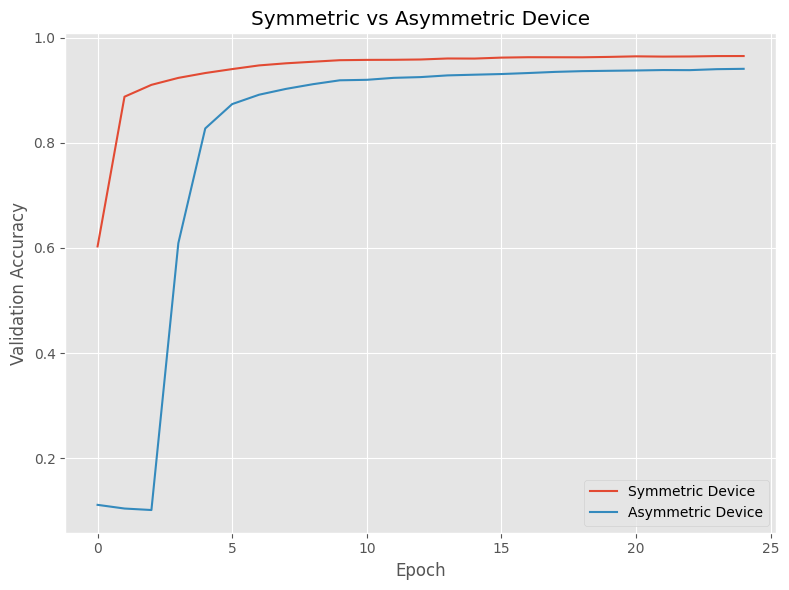

In [4]:
symmetric_data = pd.read_csv(PATH_TEST23 + 'aihwkit/pulsedAmplitudeSweep_DCIV[LBE247_ID294YR(1)]20240919110516/metrics.csv')
asymmetric_data = pd.read_csv(PATH_TEST23 + 'aihwkit/pulsedAmplitudeSweep_DCIV[LBE247_ID294YR(3)]20240919111350/metrics.csv')


fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(symmetric_data['epoch'], symmetric_data['val_acc'], label="Symmetric Device")
ax.plot(asymmetric_data['epoch'], asymmetric_data['val_acc'], label="Asymmetric Device")
ax.set(xlabel='Epoch', ylabel='Validation Accuracy', title='Symmetric vs Asymmetric Device')
ax.legend()
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'symmetric_vs_asymmetric_device.png')
plt.show()

/scratch/msc24h18/msc_project/src/msc_project/utils/plot_utils.py:454: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  metadata = metadata.apply(pd.to_numeric, errors='ignore')
/scratch/msc24h18/msc_project/src/msc_project/utils/plot_utils.py:454: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  metadata = metadata.apply(pd.to_numeric, errors='ignore')


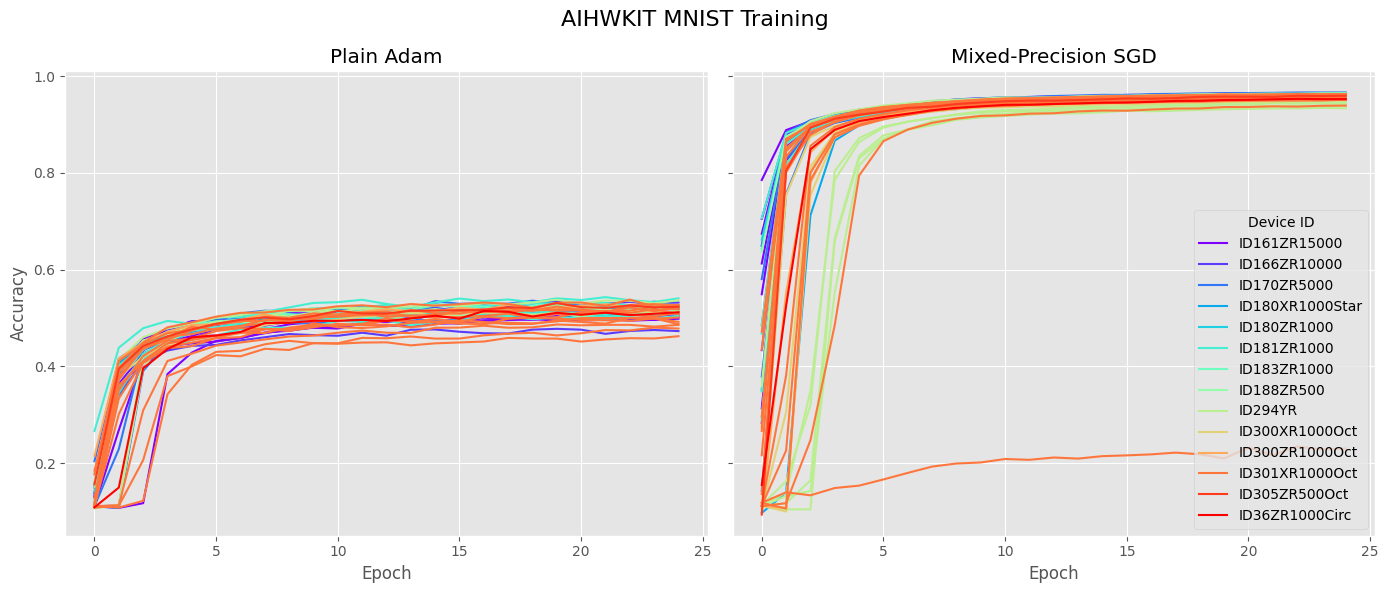

In [23]:
args = Args()
args.input = PATH_TEST42 + 'aihwkit'
args.x = 'epoch'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
pu._plot_pytorch(fig, axs[0], args)
args.input = PATH_TEST32 + 'no_out_scaling_wnstd_0/aihwkit'
pu._plot_pytorch(fig, axs[1], args)

axs[0].legend_ = None

axs[0].set(title = "Plain Adam", xlabel = "Epoch", ylabel = "Accuracy")
axs[1].set(title = "Mixed-Precision SGD", xlabel = "Epoch")
fig.suptitle("AIHWKIT MNIST Training", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_mnist_training.png')
plt.show()